In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2021/SampleSubmissionWiDS2021.csv
/kaggle/input/widsdatathon2021/SolutionTemplateWiDS2021.csv
/kaggle/input/widsdatathon2021/DataDictionaryWiDS2021.csv
/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv
/kaggle/input/widsdatathon2021/TrainingWiDS2021.csv


# Import data

In [2]:
train_df = pd.read_csv('/kaggle/input/widsdatathon2021/TrainingWiDS2021.csv')
test_df = pd.read_csv('/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv')
data_dict = pd.read_csv('/kaggle/input/widsdatathon2021/DataDictionaryWiDS2021.csv')

In [3]:
print('Training data has {} entries and {} attributes'.format(len(train_df), 
                                                              len(train_df.columns) - 1))
print('Test data has {} entries and {} attributes'.format(len(test_df), 
                                                              len(test_df.columns)))

Training data has 130157 entries and 180 attributes
Test data has 10234 entries and 180 attributes


# Exploratory Data Analysis

In [4]:
train_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


Drop duplicate rows

In [5]:
train_df.drop_duplicates(subset = ['encounter_id', 'hospital_id'], keep = 'first')

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,...,NaN,NaN,0,0,0,0,0,0,0,0
130154,130155,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,...,163.0,163.0,0,0,0,0,0,0,0,1
130155,130156,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0


Look at the age distribution in the training set

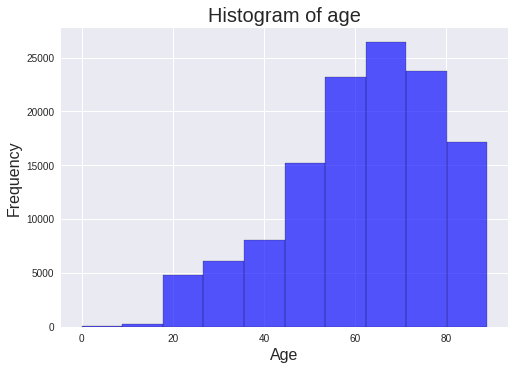

In [6]:
plt.style.use('seaborn')
plt.figure()
ax = train_df['age'].plot(kind = 'hist', color = 'blue', alpha = 0.65, ec = 'k')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Histogram of age', fontsize = 20)
plt.show()

Check for diabetes in different age groups

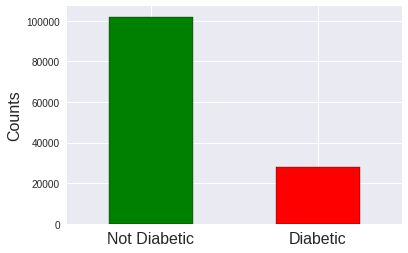

In [7]:
plt.figure(figsize = (6,4))
ax1 = train_df['diabetes_mellitus'].value_counts().plot(kind = 'bar', color = ['green', 'red'],ec = 'k')
plt.xticks(ticks = [0, 1], labels = ['Not Diabetic', 'Diabetic'], fontsize = 16, rotation = 'horizontal')
plt.ylabel('Counts', fontsize = 16)
plt.show()

In [8]:
diabetic = train_df[train_df['diabetes_mellitus'] == 1]
nondiabetic = train_df[train_df['diabetes_mellitus'] == 0]

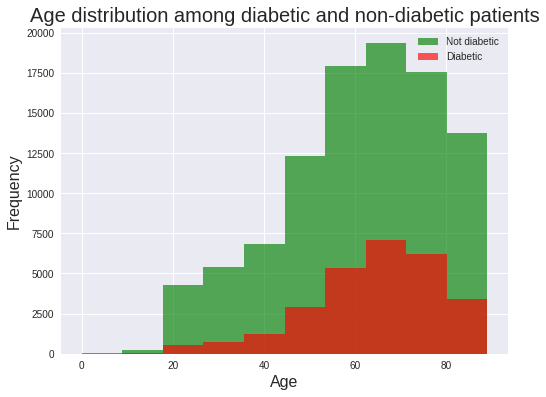

In [9]:
plt.figure(figsize = (8,6))
nondiabetic['age'].plot(kind = 'hist', color = 'green', alpha= 0.65, label = 'Not diabetic', legend = True)
diabetic['age'].plot(kind = 'hist', color = 'red', alpha= 0.65, label = 'Diabetic', legend = True)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Age distribution among diabetic and non-diabetic patients', fontsize = 20)
plt.show()

Look at gender and ethnicity information

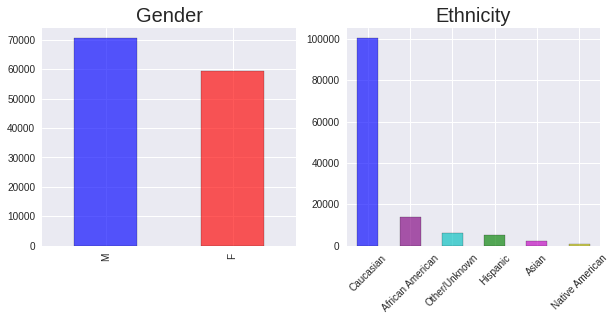

In [10]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
ax1 = train_df.gender.value_counts().plot(kind = 'bar', color = ['blue', 'red'], ec = 'black', alpha = 0.65)
ax1.set_title("Gender", fontsize= 20)
ax1.set_ylabel("")


plt.subplot(1,2,2)
ax2 = train_df.ethnicity.value_counts().plot(kind = 'bar', color = ['b', 'purple', 'c', 'g', 'm', 'y'], ec = 'black', alpha = 0.65 )
ax2.set_title("Ethnicity", fontsize= 20)
plt.xticks(rotation = 45)
ax2.set_ylabel("")
plt.show()

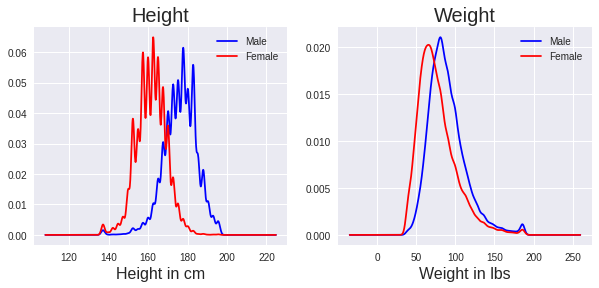

In [11]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
train_df[train_df['gender'] == 'M'].height.plot(kind = 'kde', color = 'blue', label = 'Male', legend = True)
train_df[train_df['gender'] == 'F'].height.plot(kind = 'kde', color = 'red', label = 'Female', legend = True)
plt.xlabel('Height in cm', fontsize = 16)
plt.ylabel('')
plt.title('Height', fontsize = 20)


plt.subplot(1,2,2)
train_df[train_df['gender'] == 'M'].weight.plot(kind = 'kde', color = 'blue', label = 'Male', legend = True)
train_df[train_df['gender'] == 'F'].weight.plot(kind = 'kde', color = 'red', label = 'Female', legend = True)
plt.xlabel('Weight in lbs', fontsize = 16)
plt.ylabel('')
plt.title('Weight', fontsize = 20)

plt.show()

<Figure size 432x288 with 0 Axes>

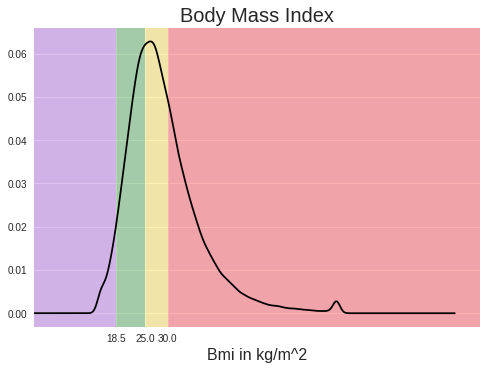

In [12]:
import matplotlib
train_df['bmi'] = train_df['bmi'].astype(float)
test_df['bmi'] = test_df['bmi'].astype(float)

plt.figure(figsize = (6, 4))
fig, ax = plt.subplots()

ax = train_df.bmi.plot(kind = 'kde', color = 'black')
plt.xlim([0, 100])

ax.axvspan(0, 18.5, facecolor='darkorchid', alpha=0.3)
ax.axvspan(18.5, 25, facecolor='green', alpha=0.3)
ax.axvspan(25, 30, facecolor='gold', alpha=0.3)
ax.axvspan(30, 100, facecolor='red', alpha=0.3)
plt.xticks([18.5, 25, 30])
plt.xlabel('Bmi in kg/m^2', fontsize = 16)
plt.ylabel('')
plt.title('Body Mass Index', fontsize = 20)
plt.show()

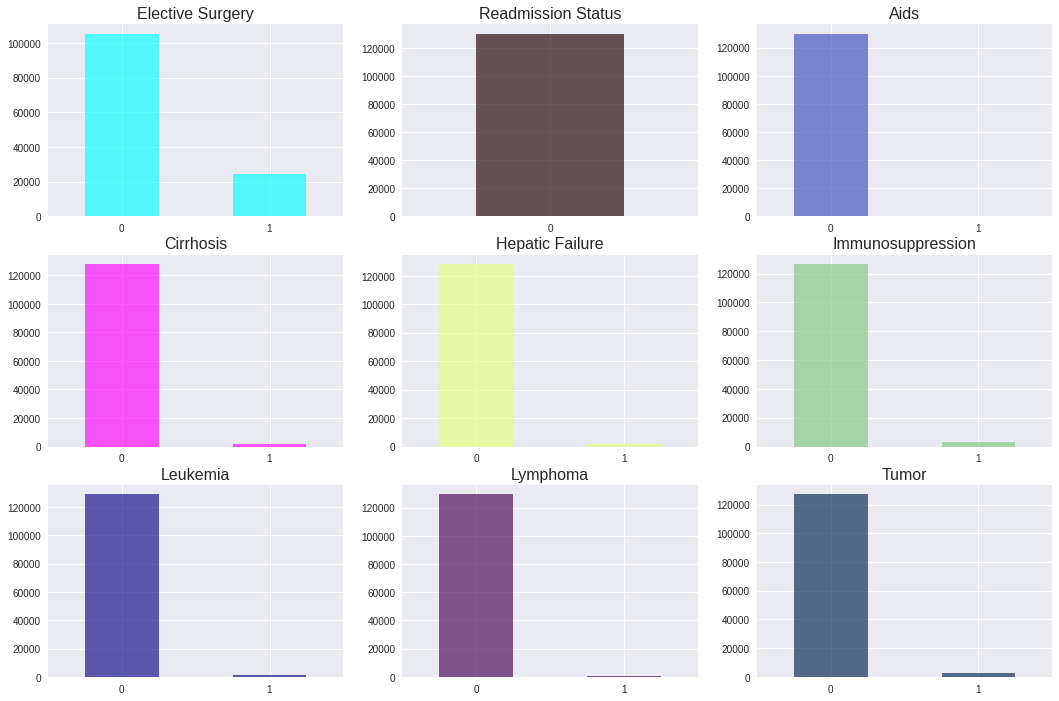

In [13]:
plt.figure(figsize = (18, 12))

plt.subplot(3,3,1)
ax1 = train_df.elective_surgery.value_counts().plot(kind = 'bar', colormap = 'cool',alpha = 0.65)
plt.title("Elective Surgery", fontsize= 16)
ax1.set_xticklabels(labels = [0,1],rotation = 0)
ax1.set_ylabel("")


plt.subplot(3,3,2)
ax2 = train_df.readmission_status.value_counts().plot(kind = 'bar', colormap = 'pink', alpha = 0.65)
plt.title("Readmission Status", fontsize= 16)
ax2.set_xticklabels(labels = [0],rotation = 0)
ax2.set_ylabel("")

plt.subplot(3,3,3)
ax3 = train_df.aids.value_counts().plot(kind = 'bar', colormap = 'coolwarm', alpha = 0.65)
plt.title("Aids", fontsize= 16)
ax3.set_xticklabels(labels = [0,1],rotation = 0)
ax3.set_ylabel("")

plt.subplot(3,3,4)
ax4 = train_df.cirrhosis.value_counts().plot(kind = 'bar', colormap = 'spring',alpha = 0.65)
plt.title("Cirrhosis", fontsize= 16)
ax4.set_xticklabels(labels = [0,1],rotation = 0)
ax4.set_ylabel("")

plt.subplot(3,3,5)
ax5 = train_df.hepatic_failure.value_counts().plot(kind = 'bar', colormap = 'Wistia',alpha = 0.65)
plt.title("Hepatic Failure", fontsize= 16)
ax5.set_xticklabels(labels = [0,1],rotation = 0)
ax5.set_ylabel("")

plt.subplot(3,3,6)
ax6 = train_df.immunosuppression.value_counts().plot(kind = 'bar', colormap = 'Accent',alpha = 0.65)
plt.title("Immunosuppression", fontsize= 16)
ax6.set_xticklabels(labels = [0,1],rotation = 0)
ax6.set_ylabel("")

plt.subplot(3,3,7)
ax7 = train_df.leukemia.value_counts().plot(kind = 'bar', colormap = 'plasma',alpha = 0.65)
plt.title("Leukemia", fontsize= 16)
ax7.set_xticklabels(labels = [0,1],rotation = 0)
ax7.set_ylabel("")

plt.subplot(3,3,8)
ax8 = train_df.lymphoma.value_counts().plot(kind = 'bar', colormap = 'viridis',alpha = 0.65)
plt.title("Lymphoma", fontsize= 16)
ax8.set_xticklabels(labels = [0,1],rotation = 0)
ax8.set_ylabel("")

plt.subplot(3,3,9)
ax9 = train_df.solid_tumor_with_metastasis.value_counts().plot(kind = 'bar', 
                                                               colormap = 'cividis', 
                                                               alpha = 0.65)
plt.title("Tumor", fontsize= 16)
ax9.set_xticklabels(labels = [0,1],rotation = 0)
ax9.set_ylabel("")
plt.show()

Separate training features and training labels and mark the test set

In [14]:
train_df_y = train_df.pop('diabetes_mellitus')
train_df_X = train_df

test_df_X = test_df
assert(len(train_df_X.columns) == len(test_df_X.columns))

Quantify the amount of missing information

In [15]:
def group_attributes_missing_info(attribute_type):
    col_name = []
    missing_num = {}
    col_name = data_dict[data_dict['Data Type'] == attribute_type]['Variable Name'].reset_index(drop = True)
    
    for col in col_name:
        if col in train_df_X.columns:
            missing_num[col] = train_df_X[col].isna().sum()*100/len(train_df_X)
        
    return missing_num

In [16]:
integer_missing = group_attributes_missing_info('integer')
print('Integer Attributes and Percentage of Missing Values')
integer_missing

Integer Attributes and Percentage of Missing Values


{'encounter_id': 0.0,
 'hospital_id': 0.0,
 'icu_id': 0.0,
 'gcs_eyes_apache': 1.6825833416566147,
 'gcs_motor_apache': 1.6825833416566147,
 'gcs_verbal_apache': 1.6825833416566147}

In [17]:
numeric_missing = group_attributes_missing_info('numeric')
print('Numeric Attributes and Percentage of Missing Values')
numeric_missing

Numeric Attributes and Percentage of Missing Values


{'age': 3.8322948439192666,
 'height': 1.5957651144387164,
 'pre_icu_los_days': 0.0,
 'weight': 2.6606329279255054,
 'albumin_apache': 60.05285923922647,
 'bilirubin_apache': 63.43108707176717,
 'bun_apache': 19.523344883486867,
 'creatinine_apache': 19.116912651643784,
 'fio2_apache': 76.61516476255599,
 'glucose_apache': 11.290979355701191,
 'heart_rate_apache': 0.23740559478168674,
 'hematocrit_apache': 20.558248884040044,
 'map_apache': 0.3226872162081179,
 'paco2_apache': 76.61516476255599,
 'paco2_for_ph_apache': 76.61516476255599,
 'pao2_apache': 76.61516476255599,
 'ph_apache': 76.61516476255599,
 'resprate_apache': 0.6207887397527602,
 'sodium_apache': 18.838018700492484,
 'temp_apache': 5.079250443694923,
 'urineoutput_apache': 48.5313890148052,
 'wbc_apache': 22.645727851748273,
 'd1_diasbp_invasive_max': 73.04101969160321,
 'd1_diasbp_invasive_min': 73.04101969160321,
 'd1_diasbp_max': 0.21281990211821109,
 'd1_diasbp_min': 0.21281990211821109,
 'd1_diasbp_noninvasive_max':

In [18]:
string_missing = group_attributes_missing_info('string')
print('String Attributes and Percentage of Missing Values')
string_missing

String Attributes and Percentage of Missing Values


{'bmi': 3.449680001843927,
 'ethnicity': 1.2192966955292455,
 'gender': 0.050707991118418526,
 'hospital_admit_source': 25.50611953256452,
 'icu_admit_source': 0.18439269497606736,
 'icu_stay_type': 0.0,
 'icu_type': 0.0,
 'apache_2_diagnosis': 1.2945903793111395,
 'apache_3j_diagnosis': 0.6645820048095761}

In [19]:
binary_missing = group_attributes_missing_info('binary')
print('Binary Attributes and Percentage of Missing Values')
binary_missing

Binary Attributes and Percentage of Missing Values


{'elective_surgery': 0.0,
 'readmission_status': 0.0,
 'apache_post_operative': 0.0,
 'arf_apache': 0.0,
 'gcs_unable_apache': 0.5447267530751323,
 'intubated_apache': 0.0,
 'ventilated_apache': 0.0,
 'aids': 0.0,
 'cirrhosis': 0.0,
 'hepatic_failure': 0.0,
 'immunosuppression': 0.0,
 'leukemia': 0.0,
 'lymphoma': 0.0,
 'solid_tumor_with_metastasis': 0.0}

# Collect and clean up bad features

Concatenate train and test dataframes

In [20]:
train_num = len(train_df_X)
combined_df = pd.concat([train_df_X, test_df_X])

Taking a shortcut here (checked each column individually in Notebook v1)
https://www.kaggle.com/iamleonie/wids-datathon-2021-diabetes-detection

Dropping records from the first hour of labs because of very high percentage of missing values and possible overlap information with the records from first 24 hours.

In [21]:
hourly_cols = train_df.columns[train_df.columns.str.startswith('h1') | train_df.columns.str.contains('invasive')]

Identify columns with high percentage of missing values

In [22]:
def missing_values(df):
    missing_cols = {}
    for col in df.columns:            
        if df[col].isna().sum()>0:
            missing_cols[col] = df[col].isna().sum()/len(df)
            
    return missing_cols

missing_cols = missing_values(train_df_X)

In [23]:
id_cols = ['encounter_id', 'hospital_id']

In [24]:
def cleanup_dataframe(df, id_cols, hourly_cols, missing_cols):
    
    #Drop Unnamed:0 column
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)
    
    #Drop id columns
    df.drop(id_cols, axis = 1, inplace = True)
    
    #As readmission status takes only 0 value in the training set, dropping that feature
    df.drop(['readmission_status'], axis = 1, inplace = True)
    
    #Drop hourly columns
    df.drop(hourly_cols, axis = 1, inplace=True)
    
    #Drop columns with more than 85% missing values
    high_missing_cols = []
    for col in df.columns:
        if col in missing_cols and missing_cols[col]>0.85:
            high_missing_cols.append(col)
            
    df.drop(high_missing_cols, axis = 1, inplace = True)
    
    return df       
    

In [25]:
cleaned_df = cleanup_dataframe(combined_df, id_cols, hourly_cols, missing_cols)

# Impute demographics

Impute the missing age with the average age of people in United States

In [26]:
avg_female_height = train_df_X[train_df_X.gender == 'F'].height.mean(skipna = True)
avg_male_height = train_df_X[train_df_X.gender == 'M'].height.mean(skipna = True)

avg_female_weight = train_df_X[train_df_X.gender == 'F'].weight.mean(skipna = True)
avg_male_weight = train_df_X[train_df_X.gender == 'M'].weight.mean(skipna = True)

avg_pop_height = 0.5*(avg_female_height + avg_male_height)
avg_pop_weight = 0.5*(avg_female_weight + avg_male_weight)

In [27]:
def impute_demographics(df, no_nan_val = False):
    
    #impute missing age with average age of people in US
    df['age'] = df['age'].fillna(38)
    
    #impute height, weight and bmi from average population information
    df["height"] = np.where((df.height.isna() & (df.gender == 'F')), avg_female_height, df["height"])
    df["height"] = np.where((df.height.isna() & (df.gender == 'M')), avg_male_height, df["height"])
    df["height"] = np.where((df.height.isna() & (df.gender.isna())), avg_pop_height, df["height"])

    df["weight"] = np.where((df.weight.isna() & (df.gender == 'F')), avg_female_weight, df["weight"])
    df["weight"] = np.where((df.weight.isna() & (df.gender == 'M')), avg_male_weight, df["weight"])
    df["weight"] = np.where((df.weight.isna() & (df.gender.isna())), avg_pop_weight, df["weight"])

    df['bmi'] = np.where((df.bmi.isna() & (df.gender == 'F')),
                                avg_female_weight/(avg_female_height/100)**2, df['bmi'])
    df['bmi'] = np.where((df.bmi.isna() & (df.gender == 'M')),
                                avg_male_weight/(avg_male_height/100)**2, df['bmi'])
    df['bmi'] = np.where((df.bmi.isna() & df.gender.isna()),
                                avg_pop_weight/(avg_pop_height/100)**2, df['bmi'])
    
    # impute blood 02 level with standard values
    df['d1_spo2_max'] = df['d1_spo2_max'].fillna(95)
    df['d1_spo2_min'] = df['d1_spo2_min'].fillna(90)
    
    #impute missing demographic information
    df['ethnicity'] = df['ethnicity'].fillna('Unknown')
    df['gender'] = df['gender'].fillna('Unknown')
    df['icu_admit_source'] = df['icu_admit_source'].fillna('Unknown')
    df['hospital_admit_source'] = df['hospital_admit_source'].fillna('Unknown')
    
    #Pass no_nan_val true if want no missing value before passing to learning algorithm
    if no_nan_val:
        numeric_cols = df.select_dtypes('float64').columns
        categorical_cols = df.select_dtypes('object').columns
        binary_cols = df.select_dtypes('int64').columns
        
        for col in numeric_cols:
            if df[col].isna().sum()>0:
                df[col] = df[col].fillna(df[col].median())

        for col in categorical_cols:
            if df[col].isna().sum()>0:
                df[col] = df[col].fillna(df[col].mode().iloc[0])      

        for col in binary_cols:
            if df[col].isna().sum()>0:
                df[col] = df[col].fillna(-1)
                

    return df

In [28]:
cleaned_df = impute_demographics(cleaned_df, no_nan_val = True)

Check if any column is still missing values (need this checkpoint only when imputing all missing features)

In [29]:
col_missing = []
for col in cleaned_df.columns:
    if cleaned_df[col].isna().sum()>0:
        col_missing.append(col)

print(col_missing)

[]


# Feature Engineering

Add marker for low levels of creatinine, liver disorders and also features such as range/ratio of min and max recorded lab values

In [30]:
unit_of_creatinine = data_dict[data_dict['Variable Name'].str.contains('creatinine')]['Unit of Measure']
print(unit_of_creatinine)

24     micromol/L
105    micromol/L
106    micromol/L
135    micromol/L
136    micromol/L
Name: Unit of Measure, dtype: object


In [31]:
unit_of_bilirubin = data_dict[data_dict['Variable Name'].str.contains('bilirubin')]['Unit of Measure']
print(unit_of_bilirubin)

22     micromol/L
99     micromol/L
100    micromol/L
129    micromol/L
130    micromol/L
Name: Unit of Measure, dtype: object


In [32]:
min_feat = [col for col in cleaned_df.columns if '_min' in col]
max_feat = [col for col in cleaned_df.columns if '_max' in col]

assert(len(min_feat) == len(max_feat))

In [33]:
def add_features(df, labs = min_feat):
    for i in labs:
        a=i
        b = i.replace('_min','_max')
        
        new_col=(str(i).replace('_min',''))+'_diff'
        df[new_col]=df[b]-df[a]
        
        new_col_ratio=(str(i).replace('_min',''))+'_ratio'
        df[new_col_ratio]=df[b]/(df[a]+0.0000000001)
        
        #Flag for high glucose level
        df['glucose_flag']=np.where(df['d1_glucose_min']>(120*.0555),1,0)
        
        #Flag for low creatinine level
        df['creatinine_flag'] = np.where(df['d1_creatinine_max']<(0.60/0.0113), 1, 0)
        
        #Flag for liver disorders
        df['liver_disorder'] = np.where((df['hepatic_failure'] == 1) & (df['cirrhosis'] == 1), 1, 0)
        
#         df['weight_age_ratio'] = df['weight']/df['age']
#         df['age_bmi_ratio'] = df['age']/df['bmi']

        #Flag for high bilirubin
        df['bilirubin_flag'] = np.where(df['d1_bilirubin_min']>(1.2/0.0113), 1, 0)
        
        #Flag for high basal metabolic index
        df['bmi_flag'] = np.where(df['bmi']>25.0, 1, 0)

    return df

In [34]:
cleaned_df = add_features(cleaned_df)

In [35]:
str_cat_cols = []
for i, col in enumerate(cleaned_df.columns):
    if cleaned_df[col].dtypes == np.object:
        str_cat_cols.append(col)
        
print(str_cat_cols)

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type']


In [36]:
for col in str_cat_cols:
    dummies = pd.get_dummies(cleaned_df[col], prefix=col, drop_first=True).astype('int64')
    cleaned_df = pd.concat([cleaned_df, dummies],axis=1)
    cleaned_df.drop(col, axis=1, inplace=True)

In [37]:
for col in cleaned_df.columns:
    if np.isinf(cleaned_df[col]).values.sum()>0:
        print(col)

In [38]:
train_df_X = cleaned_df[:train_num]
test_df_X = cleaned_df[train_num:]

In [39]:
import catboost
from catboost import CatBoost, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [40]:
!pip install imbalanced-learn

# check version number
import imblearn
print(imblearn.__version__)

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
0.7.0


In [41]:
# X_train, X_val, y_train, y_val = train_test_split(train_df_X, train_df_y, test_size=0.2, random_state=123)

In [42]:
X_train, y_train = train_df_X, train_df_y
X_test = test_df_X

In [43]:
cat_cols = []
cat_cols_index = []
for i, col in enumerate(cleaned_df.columns):
    if cleaned_df[col].dtypes == np.object or cleaned_df[col].dtypes == np.int64:
        cat_cols.append(col)
        cat_cols_index.append(i)
        
print(cat_cols)

['elective_surgery', 'icu_id', 'apache_post_operative', 'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'glucose_flag', 'creatinine_flag', 'liver_disorder', 'bilirubin_flag', 'bmi_flag', 'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown', 'ethnicity_Unknown', 'gender_M', 'gender_Unknown', 'hospital_admit_source_Chest Pain Center', 'hospital_admit_source_Direct Admit', 'hospital_admit_source_Emergency Department', 'hospital_admit_source_Floor', 'hospital_admit_source_ICU', 'hospital_admit_source_ICU to SDU', 'hospital_admit_source_Observation', 'hospital_admit_source_Operating Room', 'hospital_admit_source_Other', 'hospital_admit_source_Other Hospital', 'hospital_admit_source_Other ICU', 'hospital_admit_source_PACU', 'hospital_admit_source_Recovery Room', 'hospital_admit_source_Step-Down Unit (SDU)'

In [44]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features = cat_cols_index, random_state = 7, sampling_strategy = 0.7)

# transform the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)
print('Done.......................')

Done.......................


In [45]:
# params = {'learning_rate':0.6, 'depth':5, 'iterations':100, 
#           'loss_function':'CrossEntropy'}

# model = CatBoost(params)

# model.fit(X_train, y_train, cat_features = cat_cols)
# preds_probs = model.predict(X_train, prediction_type='Probability')

# roc = roc_auc_score(y_train, preds_probs[:,1])
# roc

In [46]:
# cat_cols = []
# for i, col in enumerate(cleaned_df.columns):
#     if cleaned_df[col].dtypes == np.object or cleaned_df[col].dtypes == np.int64:
#         cat_cols.append(col)
        
# print(cat_cols)

In [47]:
# grid = {'learning_rate': [0.025, 0.05, 0.1, 0.2],
#         'depth': [4, 6, 8, 10],
#          'iterations':[50, 100, 150, 200]}

# train_data = Pool(data = X_train, label = y_train, cat_features = cat_cols)

# cb_model = CatBoostClassifier(loss_function = 'CrossEntropy', 
#                              task_type = 'GPU', devices = '0:2')
# grid_search_result = cb_model.grid_search(grid, train_data, cv = 10, plot=True)

In [48]:
# parameters = grid_search_result['params']
# parameters

In [49]:
# cb_model_2 = CatBoostClassifier(iterations = parameters['iterations'],
#                                 learning_rate = parameters['learning_rate'],
#                                 depth = parameters['depth'], loss_function = 'CrossEntropy')

In [50]:
cb_model_2 = CatBoostClassifier(iterations = 200, learning_rate = 0.2, depth = 6, 
                              loss_function = 'CrossEntropy')
cb_model_2.fit(X_train, y_train, cat_cols)

preds = cb_model_2.predict_proba(X_train)
roc = roc_auc_score(y_train, preds[:,1])
roc

0:	learn: 0.6006036	total: 668ms	remaining: 2m 12s
1:	learn: 0.5480425	total: 1.38s	remaining: 2m 17s
2:	learn: 0.5020309	total: 1.82s	remaining: 1m 59s
3:	learn: 0.4808147	total: 2.23s	remaining: 1m 49s
4:	learn: 0.4529934	total: 2.64s	remaining: 1m 43s
5:	learn: 0.4418524	total: 3.07s	remaining: 1m 39s
6:	learn: 0.4114872	total: 3.46s	remaining: 1m 35s
7:	learn: 0.4041040	total: 3.87s	remaining: 1m 32s
8:	learn: 0.3927683	total: 4.23s	remaining: 1m 29s
9:	learn: 0.3794427	total: 4.65s	remaining: 1m 28s
10:	learn: 0.3758724	total: 5.05s	remaining: 1m 26s
11:	learn: 0.3727884	total: 5.36s	remaining: 1m 23s
12:	learn: 0.3594582	total: 5.75s	remaining: 1m 22s
13:	learn: 0.3546657	total: 6.15s	remaining: 1m 21s
14:	learn: 0.3522057	total: 6.52s	remaining: 1m 20s
15:	learn: 0.3494466	total: 6.82s	remaining: 1m 18s
16:	learn: 0.3422392	total: 7.24s	remaining: 1m 17s
17:	learn: 0.3371590	total: 7.66s	remaining: 1m 17s
18:	learn: 0.3350683	total: 8.05s	remaining: 1m 16s
19:	learn: 0.3340024	t

0.9558278921034733

In [51]:
unlabeled = pd.read_csv("/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv")

In [52]:
pd.DataFrame({'encounter_id':unlabeled['encounter_id'].values,
    'diabetes_mellitus':cb_model_2.predict_proba(X_test)[:,1]}).to_csv('/kaggle/working/Predictions1.csv',
                                                                   index=False)